## Loading the environments

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

## Importing the packages

In [2]:
from dotenv import load_dotenv
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from IPython.display import Image, display
from langgraph.graph import StateGraph , START , END , MessageGraph 
from langchain_core.messages import HumanMessage , AIMessage , SystemMessage
from typing import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages
from langgraph.graph import MessagesState

import datetime

In [3]:
model = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

## Some utility functions 

In [ ]:
# to display the graph
def display_graph(app):
    # this function will display the graph of the app
    try:
        display(Image(app.get_graph().draw_mermaid_png()))
    except Exception as e:
        # This requires some extra dependencies and is optional
        print(e)


# To stream the output of the app
def stream_output(app, input):
    for output in app.stream(input):
        for key,value in output.items():
            print(f"here is output from {key}")
            print("_______")
            print(value)
            print("\n")

In [5]:
#defining the state
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [6]:
model.invoke("What is the weather in hyderabad?")

AIMessage(content="I don't have real-time access to current weather data. To get the latest weather information for Hyderabad, you can check a reliable weather website or app like Weather.com, AccuWeather, or use a voice assistant on your device. If you'd like, I can help you with general information about Hyderabad's climate!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 15, 'total_tokens': 77, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_c064fdde7c', 'id': 'chatcmpl-COOC6SMr4d8UuOs9m7GQVBffCOPrR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--46229eec-3b75-4776-92bd-7624bf516aed-0', usage_metadata={'input_tokens': 15, 'output_tokens': 62, 'total_tokens': 77,

## Part 1 : Access to tools 

In [7]:
# tavily seaarch tool ---> for api go to https://app.tavily.com/home and generate an api key
from langchain_tavily import TavilySearch

search_tool=TavilySearch(max_results=2)
search_tool.invoke("What is langgraph")

{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.ibm.com/think/topics/langgraph',
   'title': 'What is LangGraph? - IBM',
   'content': '*   [Overview](https://www.ibm.com/think/topics/ai-agents#7281535) *   [Overview](https://www.ibm.com/think/topics/components-of-ai-agents#498277090) *   [Learning](https://www.ibm.com/think/topics/ai-agent-learning#498277087) *   [Tutorial: LangGraph ReAct agent](https://www.ibm.com/think/tutorials/deploy-langgraph-react-agent-manage-it-support-tickets-watsonx-ai#1287801557) *   [Overview](https://www.ibm.com/think/topics/ai-agent-protocols#1509394340) *   [Tutorial: LangGraph ReAct agent](https://www.ibm.com/think/tutorials/deploy-langgraph-react-agent-manage-it-support-tickets-watsonx-ai#80364620) *   [Overview](https://www.ibm.com/think/insights/ai-agent-governance#1268897081) *   [Overview](https://www.ibm.com/think/topics/ai-agent-use-cases#257779831) *   [Human resour

In [8]:
search_tool.invoke("What is the weather in bangalore today")

{'query': 'What is the weather in bangalore today',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Weather in bangalore',
   'url': 'https://www.weatherapi.com/',
   'content': "{'location': {'name': 'Bangalore', 'region': 'Karnataka', 'country': 'India', 'lat': 12.9833, 'lon': 77.5833, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1759929393, 'localtime': '2025-10-08 18:46'}, 'current': {'last_updated_epoch': 1759929300, 'last_updated': '2025-10-08 18:45', 'temp_c': 24.0, 'temp_f': 75.2, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}, 'wind_mph': 4.3, 'wind_kph': 6.8, 'wind_degree': 100, 'wind_dir': 'E', 'pressure_mb': 1014.0, 'pressure_in': 29.94, 'precip_mm': 0.03, 'precip_in': 0.0, 'humidity': 83, 'cloud': 75, 'feelslike_c': 25.8, 'feelslike_f': 78.5, 'windchill_c': 23.8, 'windchill_f': 74.8, 'heatindex_c': 25.6, 'heatindex_f': 78.2, 'dewpoint_c': 19.5, 'dewpoint_f': 

## Lets create 6 tools

In [10]:

#defining search tool
search_tool = TavilySearch(max_results=2)


def search_web(user_question):
    """
    This function will search a web search for the user question
    Args:
        user_question (str): The question to search
    Returns:
        search_results (list): The search results
    """
    search_results = search_tool.invoke(user_question)["results"]
    return search_results

#mathematical tool - addition
def add_numbers(a,b):
    """
    This function will add two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The sum of the two numbers
    """
    return a+b

#mathematical tool - subtraction
def subtract_numbers(a,b):
    """
    This function will subtract two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The difference of the two numbers
    """
    return a-b

#mathematical tool - multiplication
def multiply_numbers(a,b):
    """
    This function will multiply two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The product of the two numbers
    """
    return a*b

#mathematical tool - division
def divide_numbers(a,b):
    """
    This function will divide two numbers
    Args:
        a (int): The first number
        b (int): The second number
    Returns:
        result (int): The quotient of the two numbers
    """
    return a/b


# tool to get the current time
def get_current_time():
    """
    This function will get the current time
    Returns:
        result (str): The current time
    """
    return datetime.now().strftime("%H:%M:%S")


In [11]:
tools_list = [search_web, add_numbers, subtract_numbers, multiply_numbers, divide_numbers, get_current_time]

In [12]:
#bind the tools with llm
llm_with_tool = model.bind_tools(tools_list)

In [13]:
llm_with_tool.invoke("What is the weather of bangalore today?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ILyoYiUpTWpItrNuiGOg4R0P', 'function': {'arguments': '{"user_question":"weather of Bangalore today"}', 'name': 'search_web'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 348, 'total_tokens': 366, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_95d112f245', 'id': 'chatcmpl-COOHAveErTxfWGJdW2GK1Y2yFkAqT', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5a5e5273-f4ee-4c2c-86cf-5e2878229a8e-0', tool_calls=[{'name': 'search_web', 'args': {'user_question': 'weather of Bangalore today'}, 'id': 'call_ILyoYiUpTWpItrNuiGOg4R0P', 'type': 'tool_call'}], usage_metadata={'input_tokens': 348, 'output_to

In [14]:
def tool_calling_llm(state: State):

    response = llm_with_tool.invoke(state["messages"])
    return {"messages": [response]}

In [15]:
#define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

graph = StateGraph(State)

graph.add_node("LLM binded with tools" , tool_calling_llm)
graph.add_node("tools" , ToolNode(tools_list))

graph.add_edge(START, "LLM binded with tools")
graph.add_conditional_edges(
    "LLM binded with tools",
    #if the tool is called then it will go to the next node else it will go to the end node
    tools_condition
)

graph.add_edge("tools" , END)

app = graph.compile()

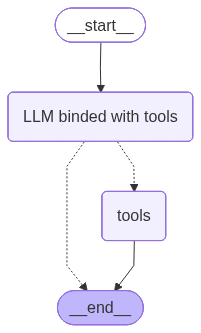

In [16]:
display_graph(app)

In [19]:
response = app.invoke({
    "messages": ["hey how are you"]
})

In [20]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

hey how are you
================================== Ai Message ==================================

Hello! I'm just a bunch of code, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?


In [21]:
response = app.invoke({
    "messages": ["What is the weather in bangalore today?"]
})

In [22]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the weather in bangalore today?
================================== Ai Message ==================================
Tool Calls:
  search_web (call_GywQOCiU9SBX7FKhQtRegpRN)
 Call ID: call_GywQOCiU9SBX7FKhQtRegpRN
  Args:
    user_question: weather in Bangalore today
================================= Tool Message =================================
Name: search_web

[{"title": "Weather in Bangalore", "url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Bangalore', 'region': 'Karnataka', 'country': 'India', 'lat': 12.9833, 'lon': 77.5833, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1759929629, 'localtime': '2025-10-08 18:50'}, 'current': {'last_updated_epoch': 1759929300, 'last_updated': '2025-10-08 18:45', 'temp_c': 23.0, 'temp_f': 73.4, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}, 'wind_mph': 4.3, 'win

In [23]:
response=app.invoke({"messages":"What is 5 multiplied by 4"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (call_Z6oLUknZHLVBsKEJvDakKKgK)
 Call ID: call_Z6oLUknZHLVBsKEJvDakKKgK
  Args:
    a: 5
    b: 4
================================= Tool Message =================================
Name: multiply_numbers

20


In [24]:
## this is something to note about 
response=app.invoke({"messages":"What is 5 multiplied by 4 and where is taj mahal"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4 and where is taj mahal
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (call_NbV1YYO7DYsbN54D96Frpd1V)
 Call ID: call_NbV1YYO7DYsbN54D96Frpd1V
  Args:
    a: 5
    b: 4
  search_web (call_LoqCtQ2IDkkn3PMJbJM3T25Z)
 Call ID: call_LoqCtQ2IDkkn3PMJbJM3T25Z
  Args:
    user_question: Where is Taj Mahal?
================================= Tool Message =================================
Name: multiply_numbers

20
================================= Tool Message =================================
Name: search_web

[{"url": "https://en.wikipedia.org/wiki/Taj_Mahal", "title": "Taj Mahal - Wikipedia", "content": "[Jump to content](https://en.wikipedia.org/wiki/Taj_Mahal#bodyContent) *   [Random article](https://en.wikipedia.org/wiki/Special:Random \"Visit a randomly selected article [x]\") [Search](https://en.wikipedia.org/wiki/Spe

## Part 2: Improving the workflow by passing the tools output back to llm - ReACT agent

In [25]:
# define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(State)

workflow.add_node("LLM binded with tools", tool_calling_llm)
workflow.add_node("tools" , ToolNode(tools_list))

workflow.add_edge(START, "LLM binded with tools")
workflow.add_conditional_edges(
    "LLM binded with tools",
    tools_condition
)
workflow.add_edge("tools", "LLM binded with tools")

app2 = workflow.compile()

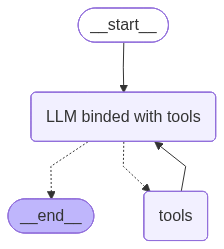

In [26]:
display_graph(app2)

In [27]:
response = app2.invoke(
    {
        "messages" : [" What is 4 multiplied by 5 and who built tajamahal?"]
    }
)

In [28]:
for m in response['messages']:
    m.pretty_print()


================================ Human Message =================================

 What is 4 multiplied by 5 and who built tajamahal?
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (call_tLF8GxRg9BRBJPjJFJ7h3jYU)
 Call ID: call_tLF8GxRg9BRBJPjJFJ7h3jYU
  Args:
    a: 4
    b: 5
  search_web (call_JdFmXW1ioxF9JjmnmMLGoVjl)
 Call ID: call_JdFmXW1ioxF9JjmnmMLGoVjl
  Args:
    user_question: Who built the Taj Mahal?
================================= Tool Message =================================
Name: multiply_numbers

20
================================= Tool Message =================================
Name: search_web

[{"url": "https://www.ebsco.com/research-starters/architecture/shah-jahan-builds-taj-mahal", "title": "Shah Jahan Builds the Taj Mahal | Research Starters - EBSCO", "content": "# Shah Jahan Builds the Taj Mahal # Shah Jahan Builds the Taj Mahal *The grand Taj Mahal was built by Mughal emperor Shah Jahan, accord

## Part 3: Inbuilt ReACT agent by langgraph

In [29]:
from langgraph.prebuilt import create_react_agent

In [30]:
react_agent = create_react_agent(
    model=model,
    tools=tools_list
)

In [31]:
response = react_agent.invoke({"messages":"What is 5 multiplied by 4 and who built taj mahal"})
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 5 multiplied by 4 and who built taj mahal
================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (call_KteHFoocA4Y8cwTSb6taEZ9d)
 Call ID: call_KteHFoocA4Y8cwTSb6taEZ9d
  Args:
    a: 5
    b: 4
  search_web (call_SwgFrpIrPBLJR1lROPsIDVnF)
 Call ID: call_SwgFrpIrPBLJR1lROPsIDVnF
  Args:
    user_question: Who built Taj Mahal?
================================= Tool Message =================================
Name: multiply_numbers

20
================================= Tool Message =================================
Name: search_web

[{"url": "https://en.wikipedia.org/wiki/Taj_Mahal", "title": "Taj Mahal - Wikipedia", "content": "[Jump to content](https://en.wikipedia.org/wiki/Taj_Mahal#bodyContent) *   [Random article](https://en.wikipedia.org/wiki/Special:Random \"Visit a randomly selected article [x]\") [Search](https://en.wikipedia.org/wiki/S

## Part 4 : Memory in langgraphs

In [32]:
app2.invoke({"messages":"Hey my name is Suman"})

{'messages': [HumanMessage(content='Hey my name is Suman', additional_kwargs={}, response_metadata={}, id='20ecff68-ae69-4f08-8bdb-aa35c9ce43b7'),
  AIMessage(content='Hello Suman! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 345, 'total_tokens': 357, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_95d112f245', 'id': 'chatcmpl-COObTNUrv7rtNq5eek6KTF3021wp7', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d5c09d53-1041-4c07-9b4b-7f403969c765-0', usage_metadata={'input_tokens': 345, 'output_tokens': 12, 'total_tokens': 357, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [33]:
app2.invoke({"messages":"Hey what is my name"})

{'messages': [HumanMessage(content='Hey what is my name', additional_kwargs={}, response_metadata={}, id='55d42a4a-32d8-45b9-b0ef-2504893aac9e'),
  AIMessage(content="I don't have access to your personal information, so I don't know your name. If you'd like, you can tell me your name!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 344, 'total_tokens': 372, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_95d112f245', 'id': 'chatcmpl-COObfEUXnXrln7dIW29pBIFFBOdzZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--99b29276-9071-4747-b3eb-683214f0c995-0', usage_metadata={'input_tokens': 344, 'output_tokens': 28, 'total_tokens': 372, 'input_token_details': {'audio': 0, 'c

In [34]:
from langgraph.checkpoint.memory import MemorySaver

# define the workflow
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

#inmemory checkpoint
memory = MemorySaver()

workflow = StateGraph(State)

workflow.add_node("LLM binded with tools", tool_calling_llm)
workflow.add_node("tools" , ToolNode(tools_list))

workflow.add_edge(START, "LLM binded with tools")
workflow.add_conditional_edges(
    "LLM binded with tools",
    tools_condition
)
workflow.add_edge("tools", "LLM binded with tools")

app2 = workflow.compile(checkpointer=memory)

In [35]:
config={"configurable":{"thread_id":"1"}}
response=app2.invoke({"messages":"Hi my name is Suman"},config=config)
print(response["messages"][-1].content)

Hello Suman! How can I assist you today?


In [36]:
response=app2.invoke({"messages":"Hi what is my name?"},config=config)
print(response["messages"][-1].content)

Your name is Suman. How can I help you further?


## Part 6 : Streaming in Langgraph 

Methods: .stream() and astream()

These methods are sync and async methods for streaming back results.
Additional parameters in streaming modes for graph state

for stream based events 

values : This streams the full state of the graph after each node is called. \
updates : This streams updates to the state of the graph after each node is called.

### for 'value' based astream modes

In [37]:
# Create a thread
config = {"configurable": {"thread_id": "2"}}

chunks  = app2.stream({'messages':"Hi,My name is Suman And I like cricket"},config,stream_mode="values")

for chunk in chunks:
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Suman And I like cricket', additional_kwargs={}, response_metadata={}, id='26fca706-cff0-4040-a7e5-46bb07cf806b')]}
{'messages': [HumanMessage(content='Hi,My name is Suman And I like cricket', additional_kwargs={}, response_metadata={}, id='26fca706-cff0-4040-a7e5-46bb07cf806b'), AIMessage(content="Hi Suman! It's great to meet you. Cricket is a fantastic sport. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 350, 'total_tokens': 376, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_95d112f245', 'id': 'chatcmpl-COOp6DJe9k634FHa4EuKkkPO2ZrWR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, 

In [39]:
# Create a thread
config = {"configurable": {"thread_id": "2"}}

chunks  = app2.stream({'messages':"Ohh  I like movies too"},config,stream_mode="values")

for chunk in chunks:
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Suman And I like cricket', additional_kwargs={}, response_metadata={}, id='26fca706-cff0-4040-a7e5-46bb07cf806b'), AIMessage(content="Hi Suman! It's great to meet you. Cricket is a fantastic sport. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 350, 'total_tokens': 376, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_95d112f245', 'id': 'chatcmpl-COOp6DJe9k634FHa4EuKkkPO2ZrWR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--8fdb9151-bd18-4508-995c-380eb4b80ea1-0', usage_metadata={'input_tokens': 350, 'output_tokens': 26, 'total_tokens': 376, 'input_token_details': {'audio': 0, '

### for 'update' based astream modes

In [40]:
# using updates method : only the recent values are reflected
# Create a thread
config = {"configurable": {"thread_id": "6"}}

chunks = app2.stream({'messages':"Hi,My name is Suman And I like cricket"},config,stream_mode="updates")
for chunk in chunks:
    print(chunk)

{'LLM binded with tools': {'messages': [AIMessage(content="Hi Suman! It's great to meet you. Cricket is a fantastic sport. Do you have a favorite team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 350, 'total_tokens': 376, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_95d112f245', 'id': 'chatcmpl-COOqMVVd202Woyz2kgkSFpxGdb1yQ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--435d6aa3-2cae-4ec8-b524-957038bfffdd-0', usage_metadata={'input_tokens': 350, 'output_tokens': 26, 'total_tokens': 376, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [41]:
config = {"configurable": {"thread_id": "6"}}

chunks = app2.stream({'messages':"Ohh  I like movies too"},config,stream_mode="updates")
for chunk in chunks:
    print(chunk)

{'LLM binded with tools': {'messages': [AIMessage(content="That's awesome, Suman! Movies are a great way to relax and enjoy some storytelling. What kind of movies do you like? Any favorite genres or films?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 390, 'total_tokens': 423, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_95d112f245', 'id': 'chatcmpl-COOqYnxBFtGc9vV4wn4mjrRg1LeQA', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d26e92a4-114b-4473-863a-c43c379f1d43-0', usage_metadata={'input_tokens': 390, 'output_tokens': 33, 'total_tokens': 423, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


## astream events 

In [42]:
config = {"configurable": {"thread_id": "3"}}

async for event in app2.astream_events({"messages":["HI How are you doing?"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['HI How are you doing?']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '29b7ca31-3292-4226-b7a8-f89db4a7a6e6', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='HI How are you doing?', additional_kwargs={}, response_metadata={}, id='8932f158-e001-41d8-951b-e01433df18fd')]}}, 'name': 'LLM binded with tools', 'tags': ['graph:step:1'], 'run_id': '6546ca20-8e20-43fb-be60-e75ec735f4d7', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'LLM binded with tools', 'langgraph_triggers': ('branch:to:LLM binded with tools',), 'langgraph_path': ('__pregel_pull', 'LLM binded with tools'), 'langgraph_checkpoint_ns': 'LLM binded with tools:1bb249a2-8a8c-583a-ffd3-3a4ebf011190'}, 'parent_ids': ['29b7ca31-3292-4226-b7a8-f89db4a7a6e6']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='HI How are you doing?'

In [44]:
config = {"configurable": {"thread_id": "8"}}
input = {
    "messages": ["give me details about cricket world cup 2011?"]
}

events = app2.astream_events(input=input, config = config,version="v2")

async for event in events: 
    if event["event"] == "on_chat_model_stream":
        print(event["data"]["chunk"].content, end="", flush=True)

The 2011 ICC Cricket World Cup was the tenth edition of the Cricket World Cup. It was hosted by India, Sri Lanka, and Bangladesh, with Bangladesh hosting World Cup matches for the first time. India won the tournament by defeating Sri Lanka by six wickets in the final held at Wankhede Stadium in Mumbai. This victory made India the first country to win the Cricket World Cup final on home soil. The tournament featured 18 umpires from various countries officiating the matches. If you want more specific details or information about particular matches or players, feel free to ask!

## Small experiment : using the weather api as a tool

In [45]:
load_dotenv()
weather_api = os.getenv("WEATHER_API_KEY")

In [46]:
import requests
def get_detailed_weather_weatherapi(city: str):
    """
    Fetches an extended weather report, including air quality, for a given city using WeatherAPI.

    Parameters:
        city (str): The name of the city to get the weather for.
        api_key (str): Your WeatherAPI key.

    Returns:
        str: A detailed weather and air quality report as a text message.
    """
    base_url = "http://api.weatherapi.com/v1/current.json"
    params = {
        "key": weather_api,
        "q": city,
        "aqi": "yes"  # Include air quality data
    }
    
    try:
        response = requests.get(base_url, params=params)
        data = response.json()
        
        if response.status_code == 200:
            # Extract key weather details
            location = data["location"]["name"]
            country = data["location"]["country"]
            temperature = data["current"]["temp_c"]
            feels_like = data["current"]["feelslike_c"]
            condition = data["current"]["condition"]["text"]
            wind_speed = data["current"]["wind_kph"]
            wind_direction = data["current"]["wind_dir"]
            humidity = data["current"]["humidity"]
            cloudiness = data["current"]["cloud"]
            last_updated = data["current"]["last_updated"]

            # Extract air quality data
            aqi_data = data["current"]["air_quality"]
            co = aqi_data.get("co", "N/A")  # Carbon Monoxide
            no2 = aqi_data.get("no2", "N/A")  # Nitrogen Dioxide
            o3 = aqi_data.get("o3", "N/A")  # Ozone
            pm10 = aqi_data.get("pm10", "N/A")  # Particulate Matter 10
            pm2_5 = aqi_data.get("pm2_5", "N/A")  # Particulate Matter 2.5
            so2 = aqi_data.get("so2", "N/A")  # Sulfur Dioxide

            # Build the detailed weather and air quality report
            weather_report = (
                f"Weather in {location}, {country}:\n"
                f"- Condition: {condition}\n"
                f"- Temperature: {temperature}°C (Feels like: {feels_like}°C)\n"
                f"- Wind: {wind_speed} kph, Direction: {wind_direction}\n"
                f"- Humidity: {humidity}%\n"
                f"- Cloudiness: {cloudiness}%\n"
                f"- Last updated: {last_updated}\n\n"
                f"Air Quality Index (AQI):\n"
                f"- CO (Carbon Monoxide): {co} µg/m³\n"
                f"- NO2 (Nitrogen Dioxide): {no2} µg/m³\n"
                f"- O3 (Ozone): {o3} µg/m³\n"
                f"- PM10 (Particulate Matter <10µm): {pm10} µg/m³\n"
                f"- PM2.5 (Particulate Matter <2.5µm): {pm2_5} µg/m³\n"
                f"- SO2 (Sulfur Dioxide): {so2} µg/m³"
            )
            return weather_report
        else:
            return f"Error: {data.get('error', {}).get('message', 'Unable to fetch weather data')}"
    except Exception as e:
        return f"An error occurred: {str(e)}"

city_name = "Bengaluru"
print(get_detailed_weather_weatherapi(city_name))

Weather in Bengaluru, India:
- Condition: Partly cloudy
- Temperature: 23.0°C (Feels like: 25.1°C)
- Wind: 7.2 kph, Direction: ESE
- Humidity: 89%
- Cloudiness: 75%
- Last updated: 2025-10-08 19:15

Air Quality Index (AQI):
- CO (Carbon Monoxide): 537.85 µg/m³
- NO2 (Nitrogen Dioxide): 14.25 µg/m³
- O3 (Ozone): 125.0 µg/m³
- PM10 (Particulate Matter <10µm): 32.65 µg/m³
- PM2.5 (Particulate Matter <2.5µm): 25.55 µg/m³
- SO2 (Sulfur Dioxide): 7.65 µg/m³


In [47]:
tools_list = [get_detailed_weather_weatherapi]

In [48]:
llm_with_tool = model.bind_tools(tools_list)

In [49]:
#define the nodes
def tool_calling_llm(state: State):
    response = llm_with_tool.invoke(state["messages"])
    return {"messages": [response]}

In [50]:
#define the workflow
graph = StateGraph(State)
graph.add_node("LLM binded with tools" , tool_calling_llm)
graph.add_node("tools" , ToolNode(tools_list))

graph.add_edge(START, "LLM binded with tools")
graph.add_conditional_edges(
    "LLM binded with tools",
    tools_condition
)

graph.add_edge("tools" , END)

app = graph.compile()

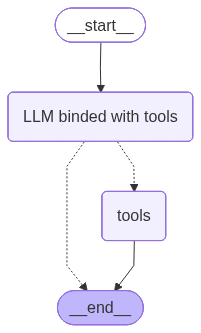

In [51]:
display_graph(app)

In [52]:
response = app.invoke({
    "messages": ["What is the weather in bangalore today?"]
})

In [53]:
for m in response['messages']:
    m.pretty_print()
    
    

================================ Human Message =================================

What is the weather in bangalore today?
================================== Ai Message ==================================
Tool Calls:
  get_detailed_weather_weatherapi (call_bR3CE0QKZY8JDxo1c85P6f41)
 Call ID: call_bR3CE0QKZY8JDxo1c85P6f41
  Args:
    city: Bangalore
================================= Tool Message =================================
Name: get_detailed_weather_weatherapi

Weather in Bangalore, India:
- Condition: Partly cloudy
- Temperature: 23.0°C (Feels like: 25.1°C)
- Wind: 7.2 kph, Direction: ESE
- Humidity: 89%
- Cloudiness: 75%
- Last updated: 2025-10-08 19:15

Air Quality Index (AQI):
- CO (Carbon Monoxide): 537.85 µg/m³
- NO2 (Nitrogen Dioxide): 14.25 µg/m³
- O3 (Ozone): 125.0 µg/m³
- PM10 (Particulate Matter <10µm): 32.65 µg/m³
- PM2.5 (Particulate Matter <2.5µm): 25.55 µg/m³
- SO2 (Sulfur Dioxide): 7.65 µg/m³


In [54]:
from langchain_core.prompts import PromptTemplate
def generate_weather_report(state: State):
    """
    generate a weather report for the user
    """

    weather_data = state["messages"][-1].content

    # Prompt template
    weather_template = PromptTemplate(
        template="""
        You are a detailed weather report generator.

        You will be given the weather data  {weather_data}

        Your target is to generate a weather report for the user in a detailed manner.

        1. Genrate the weather report in a manner that is easier to understand
        2. Suggest some activities to be done during these weather.
        3. Suggest some precautions to be taken during these weather.

        """,

        input_variables=['weather_data'],
        validate_template=True
    )

    chain = weather_template | model

    response = chain.invoke({"weather_data":weather_data})

    return {"messages": [response]}

In [55]:
#define the workflow
graph = StateGraph(State)

graph.add_node("LLM binded with tools" , tool_calling_llm)
graph.add_node("tools" , ToolNode(tools_list))
graph.add_node("weather report generator" , generate_weather_report)

graph.add_edge(START, "LLM binded with tools")
graph.add_conditional_edges(
    "LLM binded with tools",
    tools_condition
)

graph.add_edge("tools" , "weather report generator")
graph.add_edge("weather report generator" , END)

app = graph.compile()

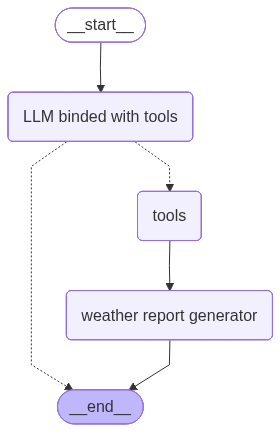

In [56]:
display_graph(app)

In [57]:
response = app.invoke(
    {
        "messages": ["What is the weather in bangalore today?"]
    }
)

In [58]:
for m in response['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the weather in bangalore today?
================================== Ai Message ==================================
Tool Calls:
  get_detailed_weather_weatherapi (call_p7HHfW6VQlGQCMHKhqt5VlwN)
 Call ID: call_p7HHfW6VQlGQCMHKhqt5VlwN
  Args:
    city: Bangalore
================================= Tool Message =================================
Name: get_detailed_weather_weatherapi

Weather in Bangalore, India:
- Condition: Partly cloudy
- Temperature: 23.0°C (Feels like: 25.1°C)
- Wind: 7.2 kph, Direction: ESE
- Humidity: 89%
- Cloudiness: 75%
- Last updated: 2025-10-08 19:15

Air Quality Index (AQI):
- CO (Carbon Monoxide): 537.85 µg/m³
- NO2 (Nitrogen Dioxide): 14.25 µg/m³
- O3 (Ozone): 125.0 µg/m³
- PM10 (Particulate Matter <10µm): 32.65 µg/m³
- PM2.5 (Particulate Matter <2.5µm): 25.55 µg/m³
- SO2 (Sulfur Dioxide): 7.65 µg/m³
================================== Ai Message =============================